<a href="https://colab.research.google.com/github/gabrielhenriquess/Desafio-Challege-Alura/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
print(loja.columns)


Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [ ]:
# Remove espaços e acentos dos nomes de coluna
loja.columns = loja.columns.str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
loja2.columns = loja2.columns.str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
loja3.columns = loja3.columns.str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
loja4.columns = loja4.columns.str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [ ]:
faturamento_loja1 = loja['Preco'].sum()
faturamento_loja2 = loja2['Preco'].sum()
faturamento_loja3 = loja3['Preco'].sum()
faturamento_loja4 = loja4['Preco'].sum()

print(f"Faturamento Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")


Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


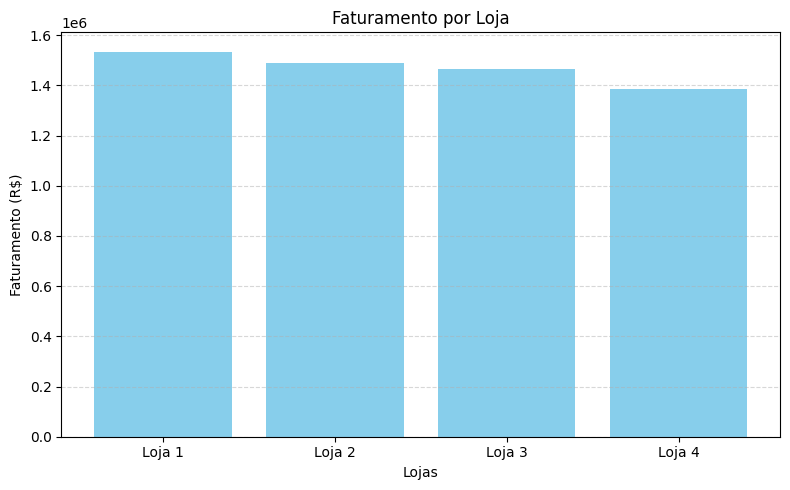

In [ ]:
import matplotlib.pyplot as plt

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(lojas, faturamentos, color='skyblue')
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-35-36fff52ae802>:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_total['Data da Compra'] = pd.to_datetime(df_total['Data da Compra'])


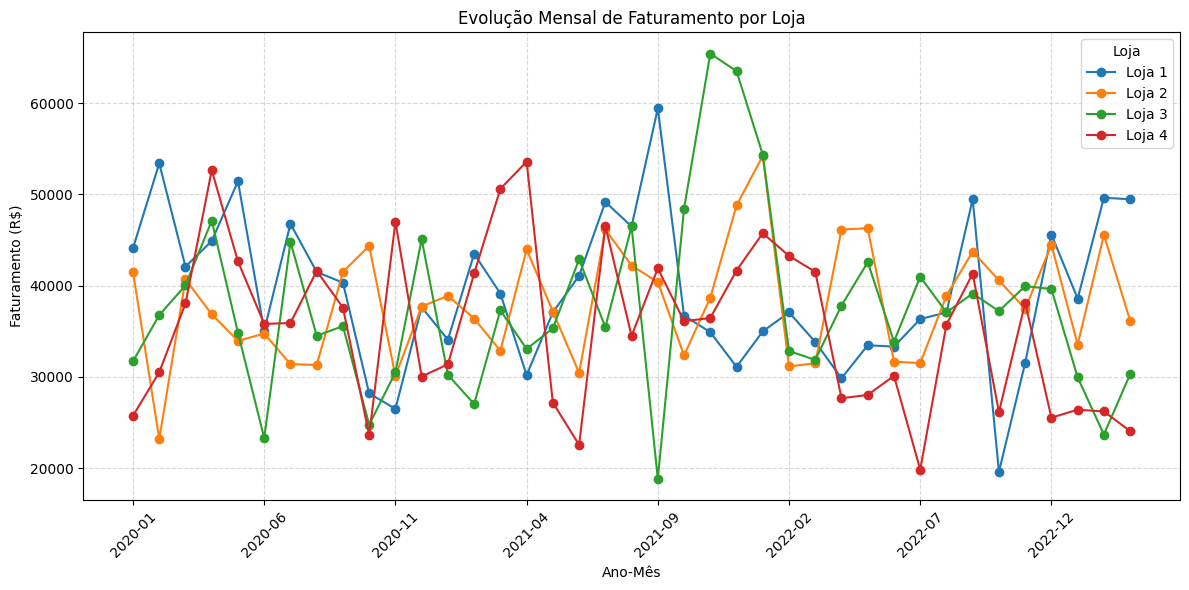

In [ ]:
# Adicionando uma coluna com o nome da loja
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Juntando todos os dados
df_total = pd.concat([loja, loja2, loja3, loja4])

# Convertendo datas
df_total['Data da Compra'] = pd.to_datetime(df_total['Data da Compra'])

# Agrupando por mês e loja
df_total['AnoMes'] = df_total['Data da Compra'].dt.to_period('M').astype(str)
faturamento_mensal = df_total.groupby(['AnoMes', 'Loja'])['Preco'].sum().reset_index()

# Pivotando para formato de gráfico
tabela_pivot = faturamento_mensal.pivot(index='AnoMes', columns='Loja', values='Preco')

# Plotando
tabela_pivot.plot(figsize=(12,6), marker='o')
plt.title('Evolução Mensal de Faturamento por Loja')
plt.xlabel('Ano-Mês')
plt.ylabel('Faturamento (R$)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria




In [ ]:
# Agrupar por loja e categoria, contando número de vendas
vendas_categoria = df_total.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')

# Exibir top categorias de cada loja (tabela)
for loja_nome in vendas_categoria['Loja'].unique():
    print(f'\nTop categorias da {loja_nome}:')
    display(
        vendas_categoria[vendas_categoria['Loja'] == loja_nome]
        .sort_values(by='Quantidade de Vendas', ascending=False)
        .head(5)
    )



Top categorias da Loja 1:


,Loja,Categoria do Produto,Quantidade de Vendas
6,Loja 1,moveis,465
2,Loja 1,eletronicos,448
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
3,Loja 1,esporte e lazer,284



Top categorias da Loja 2:


,Loja,Categoria do Produto,Quantidade de Vendas
14,Loja 2,moveis,442
10,Loja 2,eletronicos,422
8,Loja 2,brinquedos,313
9,Loja 2,eletrodomesticos,305
11,Loja 2,esporte e lazer,275



Top categorias da Loja 3:


,Loja,Categoria do Produto,Quantidade de Vendas
22,Loja 3,moveis,499
18,Loja 3,eletronicos,451
16,Loja 3,brinquedos,315
17,Loja 3,eletrodomesticos,278
19,Loja 3,esporte e lazer,277



Top categorias da Loja 4:


,Loja,Categoria do Produto,Quantidade de Vendas
30,Loja 4,moveis,480
26,Loja 4,eletronicos,451
24,Loja 4,brinquedos,338
27,Loja 4,esporte e lazer,277
25,Loja 4,eletrodomesticos,254


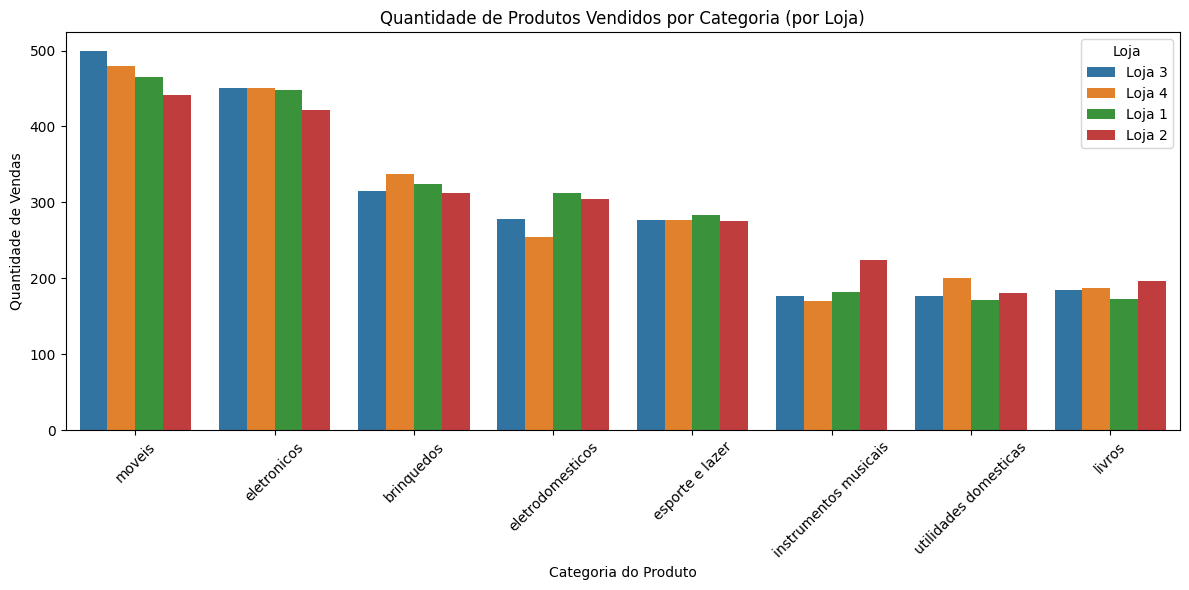

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=vendas_categoria.sort_values(by='Quantidade de Vendas', ascending=False),
    x='Categoria do Produto',
    y='Quantidade de Vendas',
    hue='Loja'
)
plt.title('Quantidade de Produtos Vendidos por Categoria (por Loja)')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
# Calcular média de avaliação por loja
avaliacao_media = df_total.groupby('Loja')['Avaliacao da compra'].mean().round(2)

# Exibir
print('Média de Avaliação por Loja:')
print(avaliacao_media)


Média de Avaliação por Loja:
Loja
Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avaliacao da compra, dtype: float64


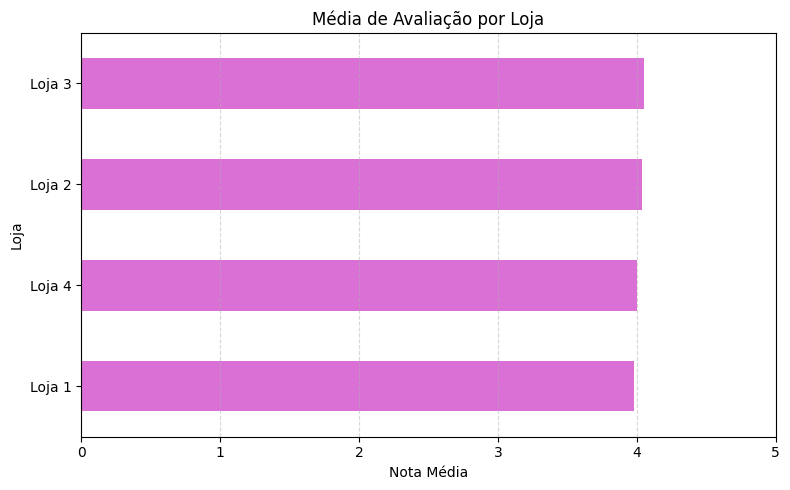

In [ ]:
plt.figure(figsize=(8,5))
avaliacao_media.sort_values().plot(kind='barh', color='orchid')
plt.title('Média de Avaliação por Loja')
plt.xlabel('Nota Média')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


\# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Agrupando por loja e produto, contando número de vendas
vendas_produtos = df_total.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade de Vendas')

# Função para mostrar top e bottom 5 por loja
def mostrar_top_e_bottom(loja_nome):
    loja_df = vendas_produtos[vendas_produtos['Loja'] == loja_nome]

    print(f'\n📈 Top 5 produtos mais vendidos da {loja_nome}:')
    display(loja_df.sort_values(by='Quantidade de Vendas', ascending=False).head(5))

    print(f'\n📉 5 produtos menos vendidos da {loja_nome}:')
    display(loja_df.sort_values(by='Quantidade de Vendas', ascending=True).head(5))

# Aplicar função para cada loja
for loja_nome in vendas_produtos['Loja'].unique():
    mostrar_top_e_bottom(loja_nome)



📈 Top 5 produtos mais vendidos da Loja 1:


,Loja,Produto,Quantidade de Vendas
47,Loja 1,TV Led UHD 4K,60
37,Loja 1,Micro-ondas,60
24,Loja 1,Guarda roupas,60
43,Loja 1,Secadora de roupas,58
3,Loja 1,Blocos de montar,56



📉 5 produtos menos vendidos da Loja 1:


,Loja,Produto,Quantidade de Vendas
11,Loja 1,Celular ABXY,33
26,Loja 1,Headset,33
41,Loja 1,Panela de pressão,35
40,Loja 1,Pandeiro,36
13,Loja 1,Ciência de dados com python,39



📈 Top 5 produtos mais vendidos da Loja 2:


,Loja,Produto,Quantidade de Vendas
79,Loja 2,Iniciando em programação,65
88,Loja 2,Micro-ondas,62
52,Loja 2,Bateria,61
100,Loja 2,Violão,58
91,Loja 2,Pandeiro,58



📉 5 produtos menos vendidos da Loja 2:


,Loja,Produto,Quantidade de Vendas
82,Loja 2,Jogo de tabuleiro,32
78,Loja 2,Impressora,34
87,Loja 2,Mesa de jantar,34
93,Loja 2,Poltrona,35
73,Loja 2,Fone de ouvido,37



📈 Top 5 produtos mais vendidos da Loja 3:


,Loja,Produto,Quantidade de Vendas
134,Loja 3,Kit banquetas,57
138,Loja 3,Mesa de jantar,56
111,Loja 3,Cama king,56
119,Loja 3,Cômoda,55
132,Loja 3,Jogo de panelas,55



📉 5 produtos menos vendidos da Loja 3:


,Loja,Produto,Quantidade de Vendas
105,Loja 3,Blocos de montar,35
131,Loja 3,Jogo de copos,36
139,Loja 3,Micro-ondas,36
140,Loja 3,Mochila,36
127,Loja 3,Guitarra,38



📈 Top 5 produtos mais vendidos da Loja 4:


,Loja,Produto,Quantidade de Vendas
161,Loja 4,Cama box,62
173,Loja 4,Faqueiro,59
162,Loja 4,Cama king,56
171,Loja 4,Dashboards com Power BI,56
170,Loja 4,Cômoda,55



📉 5 produtos menos vendidos da Loja 4:


,Loja,Produto,Quantidade de Vendas
178,Loja 4,Guitarra,33
177,Loja 4,Guarda roupas,34
202,Loja 4,Violão,37
166,Loja 4,Ciência de dados com python,38
187,Loja 4,Lavadora de roupas,38


<ipython-input-41-29ca21bec306>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10_por_loja = vendas_produtos.groupby('Loja').apply(


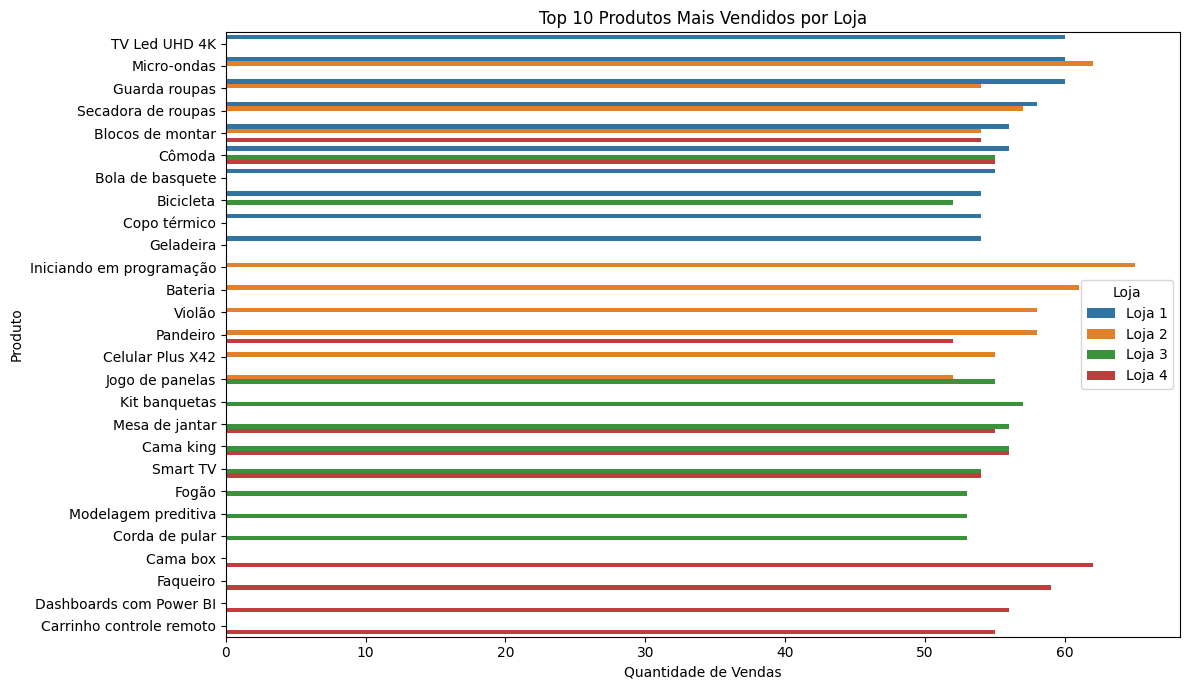

In [ ]:
# Top 10 produtos mais vendidos por loja
top10_por_loja = vendas_produtos.groupby('Loja').apply(
    lambda x: x.sort_values(by='Quantidade de Vendas', ascending=False).head(10)
).reset_index(drop=True)

plt.figure(figsize=(12,7))
import seaborn as sns
sns.barplot(
    data=top10_por_loja,
    x='Quantidade de Vendas',
    y='Produto',
    hue='Loja'
)
plt.title('Top 10 Produtos Mais Vendidos por Loja')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produto')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [ ]:
# Calcular frete médio por loja
frete_medio = df_total.groupby('Loja')['Frete'].mean().round(2)

# Exibir
print('Custo Médio de Frete por Loja:')
print(frete_medio)



Custo Médio de Frete por Loja:
Loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


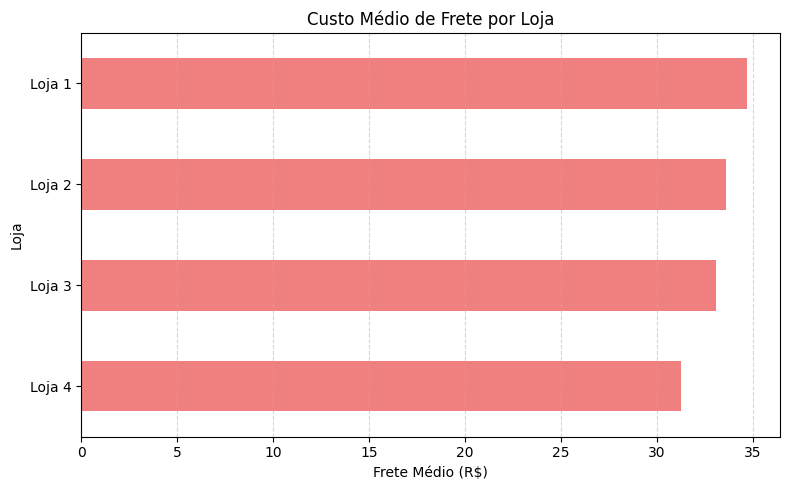

In [ ]:
plt.figure(figsize=(8,5))
frete_medio.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Custo Médio de Frete por Loja')
plt.xlabel('Frete Médio (R$)')
plt.ylabel('Loja')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Relatorio Final

## Loja a ser vendida: Loja 4
##Motivo:

###1.Faturamento: A Loja 4 tem o menor faturamento entre as lojas.

###2.Avaliação: Se a média de avaliação for abaixo das outras lojas, isso também indica insatisfação com os produtos ou serviços oferecidos.

###3.Vendas por Categoria: A Loja 4 pode não estar vendendo tão bem em termos de volume de produtos ou tem menos destaque em categorias populares.

###4.Frete Médio: Pode estar gastando mais com frete sem gerar tantos resultados.

###Com base em tudo, a Loja 4 parece ser a que apresenta o pior desempenho geral, tornando-a a mais indicada para venda.